In [15]:
import matplotlib.pyplot as plt

In [12]:
layers = [[str(i+j) for j in range(0, 4)] for i in range(0, 32, 4)]
p = 5

data = []

In [31]:
for (i, layer) in enumerate(layers):
    file_name = f"mistral_output_{p}_{"_".join(layer)}"
    with open(f"fixed_p/{file_name}", 'r') as f:
        for line in f:
            data.append((i, float(line.strip())))

Text(0.5, 1.0, 'Injection over Different Layers with p=1e-5')

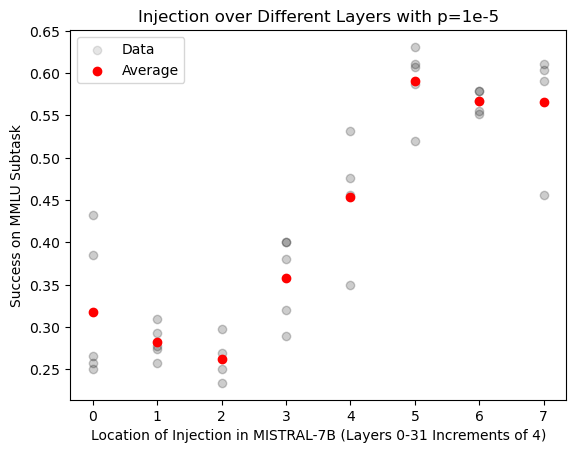

In [69]:
x = [a[0] for a in data]
y = [a[1] for a in data]

ax = list(set(x))
ay = []
for key in ax:
    lst = []
    for (ai, aj) in data:
        if ai == key:
            lst.append(aj)
    ay.append(sum(lst)/len(lst))
plt.scatter(x, y, color="black",  alpha=0.1, label="Data")
plt.scatter(ax, ay, color="red", label="Average")
plt.legend()
plt.ylabel("Success on MMLU Subtask")
plt.xlabel("Location of Injection in MISTRAL-7B (Layers 0-31 Increments of 4)")
plt.title("Injection over Different Layers with p=1e-5")

Text(0.08, 0.5, 'Success Score')

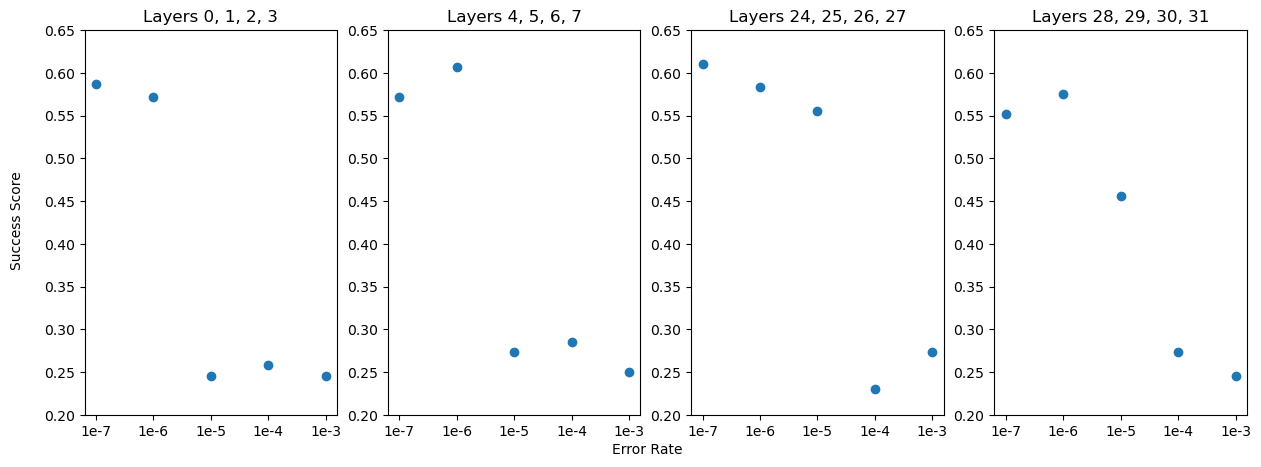

In [73]:
p = [3, 4, 5, 6, 7]
range_layer = [layers[0], layers[1], layers[-2], layers[-1]]

fig, ax = plt.subplots(1, len(range_layer), figsize=(15, 5))

for i in range(len(range_layer)):
    layer = range_layer[i]
    x = []
    y = []
    for prob in p:
        x.append(-prob)
        file_name = f"mistral_output_{prob}_{"_".join(layer)}"
        with open(f"range_p/{file_name}", 'r') as f:
            y.append(float(f.readline().strip()))
    ax[i].scatter(x, y)
    
    ax[i].set_title(f"Layers {", ".join(layer)}")

plt.setp(ax, ylim=(0.20, 0.65), xticks=[-7, -6, -5, -4, -3], xticklabels=["1e-7", "1e-6", "1e-5", "1e-4", "1e-3"])
fig.text(0.5, 0.04, 'Error Rate', ha='center', va='center')
fig.text(0.08, 0.5, 'Success Score', ha='center', va='center', rotation='vertical')